Checking GPU


In [1]:
!nvidia-smi

Sat May  4 14:27:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Mounting to Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installingf YOLO through ultralitics


In [3]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.2/755.2 kB 10.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

# Downloading the DataSet


Path to dataset in DRIVE


In [4]:
DATA_DIR='/content/Alzheimer/Alzheimer_s Dataset'

Unziping the dataset


In [5]:
!unzip "/content/drive/MyDrive/Alzheimer/Alzheimer_s Dataset.zip" -d "Alzheimer"

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1571.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1572.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1573.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1574.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1575.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1576.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1577.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1578.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1579.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem158.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1580.jpg  
  inflating: Alzheimer/Alzheimer_s Dataset/train/NonDemented/nonDem1581.jpg  
  inflating: A

# Training the model


Classification model with 50 epochs


yolo8m.pt stands for medium model


In [7]:
!yolo task=classify mode=train model=yolov8m-cls.pt data='{DATA_DIR}' epochs=50 imgsz=128

Ultralytics YOLOv8.2.8 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/Alzheimer/Alzheimer_s Dataset, epochs=50, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

# Model Evaluation


In [1]:
from ultralytics import YOLO
from IPython.display import display, Image

Confusion Matrix


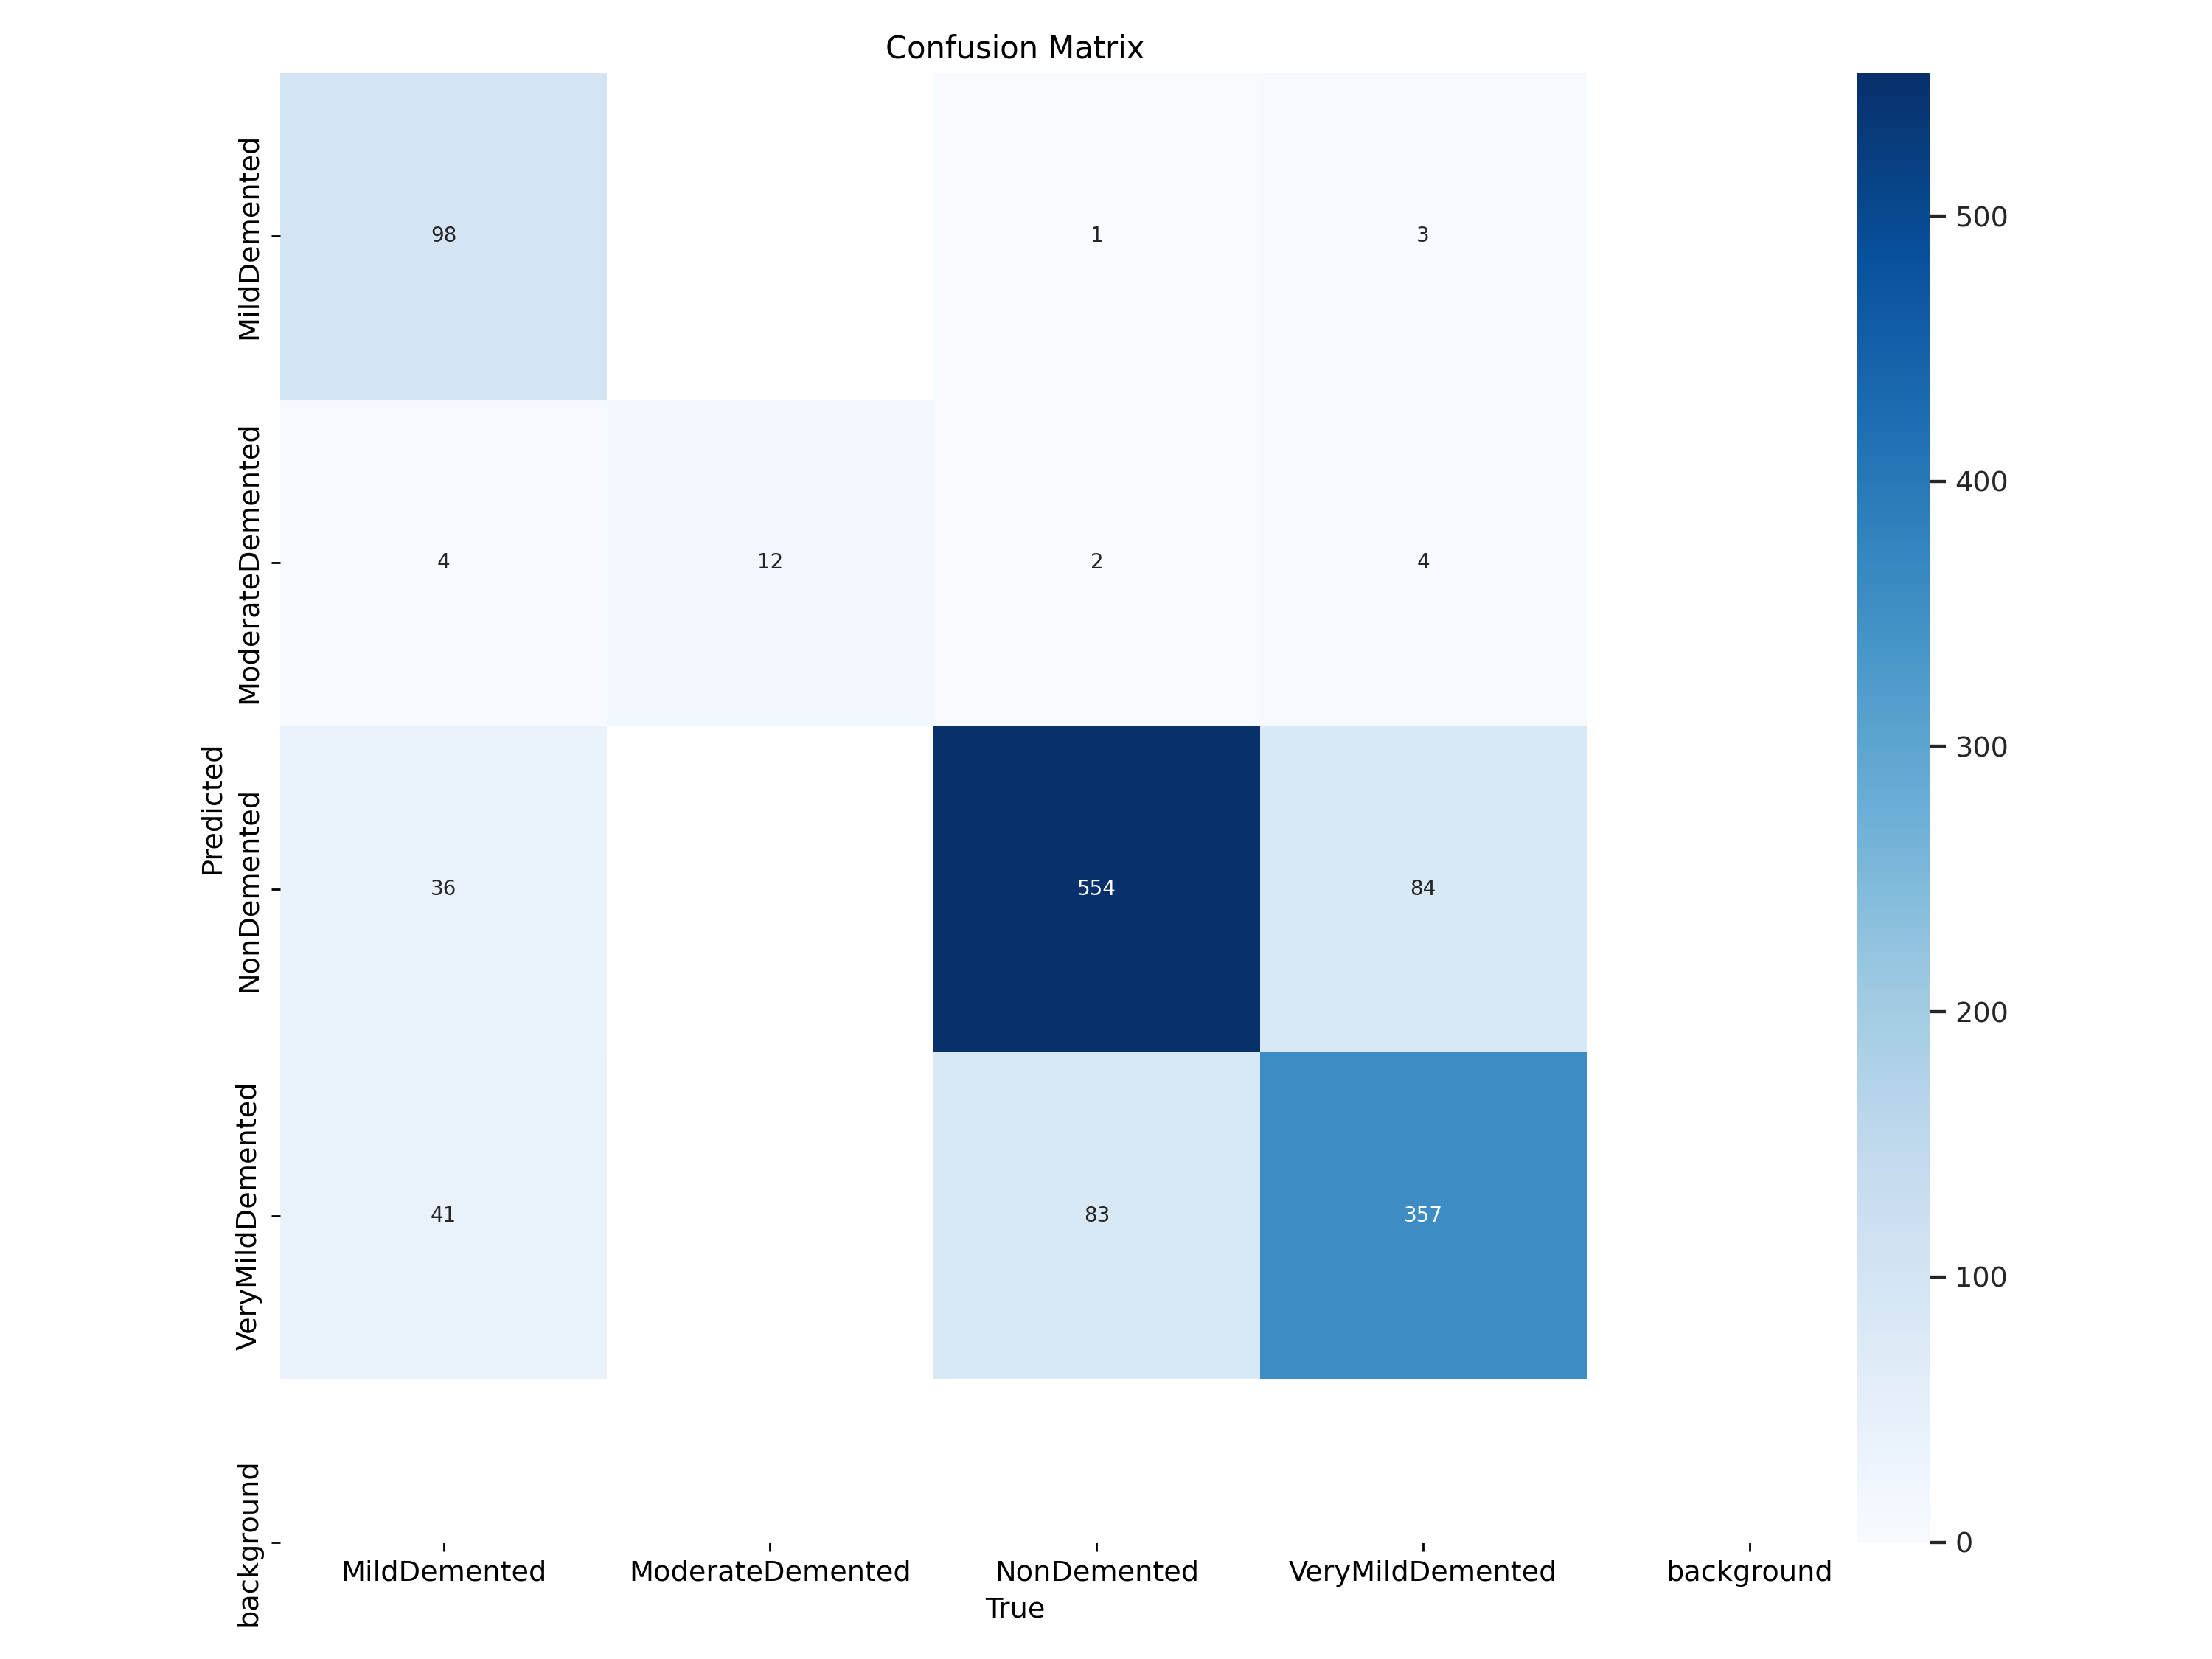

In [2]:
Image(filename=f'./runs/classify/train/confusion_matrix.png')

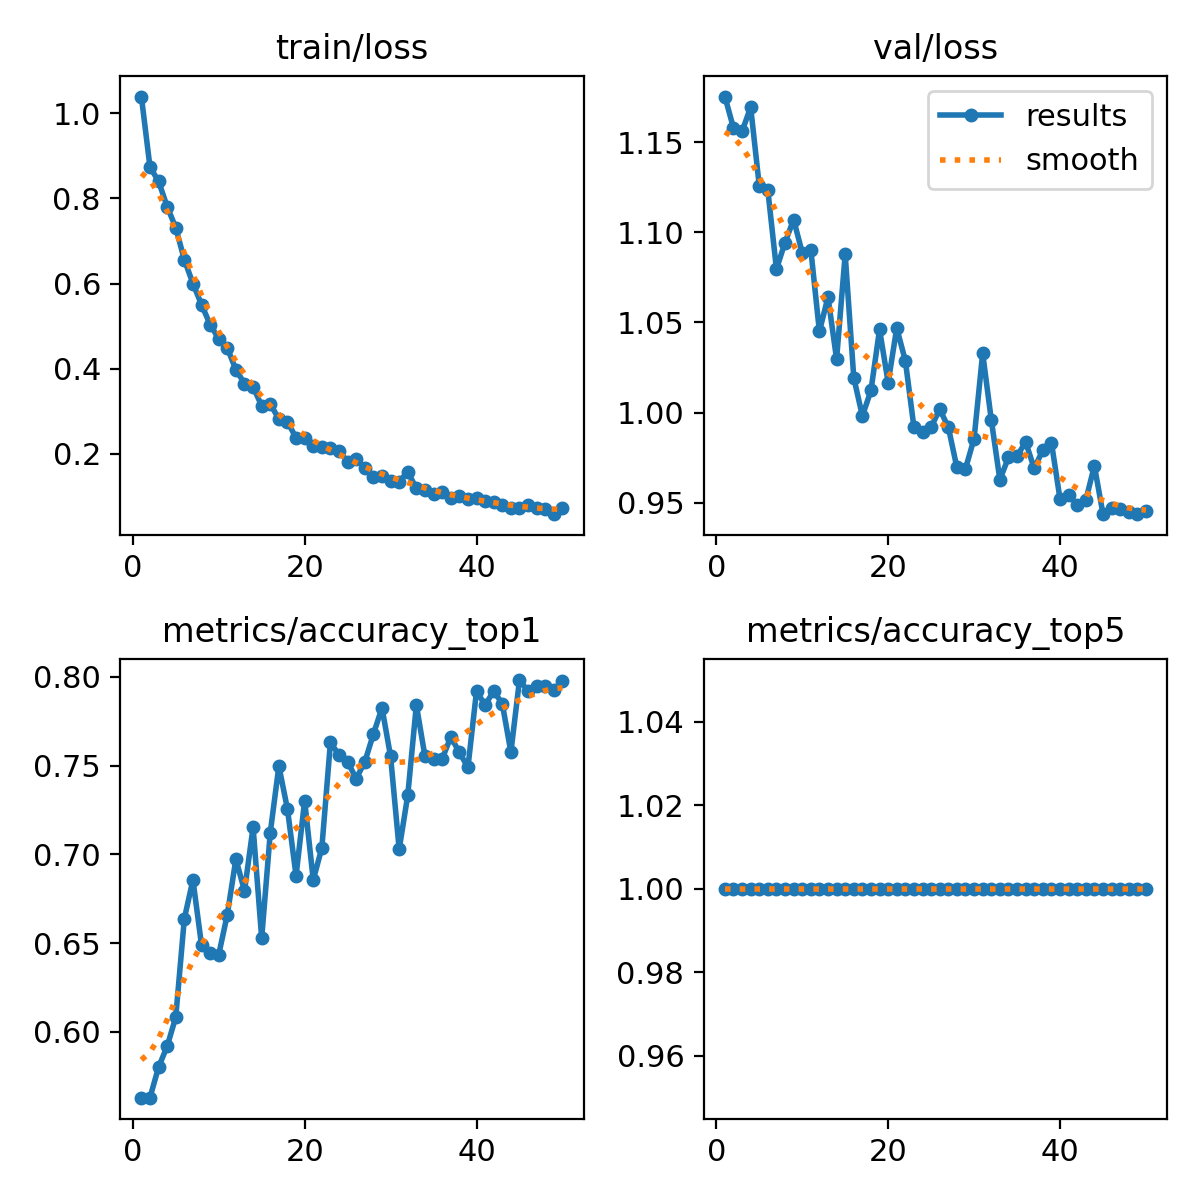

In [3]:
Image(filename=f'./runs/classify/train/results.png')

In [4]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AAC5-EAC8

 Directory of c:\Users\LOURDHU RAJU\OneDrive\Documents\Projects\Alzheimer_s Dataset

04-05-2024  08:49 PM    <DIR>          .
04-05-2024  08:06 PM    <DIR>          ..
04-05-2024  08:49 PM           530,546 alzheimer.ipynb
04-05-2024  08:46 PM    <DIR>          Alzheimer_s Dataset
04-05-2024  08:46 PM    <DIR>          runs
04-05-2024  08:45 PM        34,270,382 yolov8m-cls.pt
04-05-2024  08:48 PM         6,534,387 yolov8n.pt
               3 File(s)     41,335,315 bytes
               4 Dir(s)  229,977,436,160 bytes free


# Making prediction of unseen data


In [10]:
!yolo task=classify mode=predict model='./runs/classify/train/weights/best.pt' conf=0.25 source="./samples/303926tn.webp"

Ultralytics YOLOv8.1.30 🚀 Python-3.12.2 torch-2.2.1+cu121 CPU (11th Gen Intel Core(TM) i5-1155G7 2.50GHz)
YOLOv8m-cls summary (fused): 103 layers, 15767780 parameters, 0 gradients, 41.6 GFLOPs

image 1/1 c:\Users\LOURDHU RAJU\OneDrive\Documents\Projects\Alzheimer_s Dataset\samples\303926tn.webp: 128x128 NonDemented 0.95, MildDemented 0.04, VeryMildDemented 0.01, ModerateDemented 0.00, 38.7ms
Speed: 4.0ms preprocess, 38.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)
Results saved to runs\classify\predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict
